In [18]:
import numpy as np
import os
import joblib
from sklearn.linear_model import LinearRegression
import xlrd
import pandas as pd

df = pd.read_excel("./prob_calculation_data.xls")
df

,CalculationID,First_Name,Second_Name,Email,Step1,Step1Failure,Step2,Step2Failure,Step2CSFailure,Step3,Step3Failures,VisaNeeded,YOG,PriorResidency,ClinicalExperience,ResearchExperience,papers,speciality,Probability,Time Stamp
0,1,Sdd,Ddd,animesh.singh@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0900,2018-08-16 08:29:14
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0000,2018-08-16 08:29:14
2,3,Lovish,Wadhwa,lovish.wadhwa.16cse@bml.edu.in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,98.6200,2018-08-16 08:29:14
3,4,Parag,Singh,psparag1997@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,68.1600,2018-08-17 00:35:53
4,5,Lovish,Wadhwa,lovish.wadhwa.16cse@bml.edu.in,230.0,NaN,238.0,NaN,NaN,0.0,1.0,1.0,6.0,22,NaN,NaN,0.0,NaN,91.6100,2018-08-17 06:18:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,2598,Michael,Zeratsion,gebremichaelzeratsion@gmail.co,237.0,0.0,244.0,0.0,0.0,0.0,0.0,0.0,2015.0,No,6.0,0.0,0.0,Internal Medicine,77.2536,2019-08-29 15:57:04
2591,2599,Seifu,Abera,sfmngsh@gmail.com,256.0,0.0,262.0,0.0,0.0,0.0,0.0,0.0,2015.0,No,5.0,0.0,0.0,Internal Medicine,86.5869,2019-08-29 15:59:52
2592,2600,Seifu,Abera,sfmngsh@gmail.com,256.0,0.0,262.0,0.0,0.0,0.0,0.0,0.0,2018.0,No,5.0,12.0,2.0,Internal Medicine,95.0000,2019-08-29 16:03:13
2593,2601,Seifu,Abera,sfmngsh@gmail.com,275.0,0.0,280.0,0.0,0.0,0.0,0.0,0.0,2019.0,No,12.0,12.0,19.0,Internal Medicine,95.0000,2019-08-29 16:06:41


In [19]:
df1 = df.iloc[208:,:].reset_index(drop=True)
df1.head(15)

,CalculationID,First_Name,Second_Name,Email,Step1,Step1Failure,Step2,Step2Failure,Step2CSFailure,Step3,Step3Failures,VisaNeeded,YOG,PriorResidency,ClinicalExperience,ResearchExperience,papers,speciality,Probability,Time Stamp
0,216,elizabeth,ndungu,njirulisandungu@yahoo.com,229.0,0.0,234.0,0.0,0.0,230.0,0.0,0.0,2020.0,No,44.0,0.0,0.0,Internal Medicine,88.3600,2019-07-15 14:11:01
1,217,Jaspreet kaur,Batth,jaspreetsibia86@gmail.com,247.0,0.0,247.0,0.0,0.0,230.0,0.0,1.0,2019.0,No,3.0,0.0,0.0,Internal Medicine,82.6000,2019-07-15 15:50:43
2,218,Arshdeep singh,Batth,arsh3777@gmail.com,213.0,0.0,245.0,0.0,0.0,230.0,0.0,1.0,2012.0,No,12.0,0.0,0.0,Internal Medicine,46.1000,2019-07-15 15:52:14
3,219,Arshdeep singh,Batth,arsh3777@gmail.com,213.0,0.0,245.0,0.0,0.0,230.0,0.0,1.0,2012.0,No,12.0,0.0,0.0,Internal Medicine,46.1000,2019-07-15 15:52:14
4,220,Nimit,Desai,nimitdesai@gmail.com,229.0,0.0,228.0,0.0,0.0,230.0,0.0,1.0,2015.0,No,12.0,1.0,5.0,Neurology,57.3500,2019-07-15 16:24:58
5,221,jigisha,rakholiya,jigirakholiya@gmail.com,219.0,0.0,219.0,0.0,0.0,230.0,0.0,1.0,2016.0,No,2.0,0.0,0.0,Internal Medicine,31.9133,2019-07-15 19:20:34
6,222,kiaara,shah,kiashah263@gmail.com,219.0,0.0,219.0,0.0,0.0,225.0,0.0,1.0,2016.0,No,3.0,0.0,0.0,Internal Medicine,20.0000,2019-07-15 19:28:40
7,223,Meet,Patel,kolkkol99@gmail.com,249.0,0.0,253.0,0.0,0.0,230.0,0.0,1.0,2017.0,No,3.0,0.0,0.0,Internal Medicine,80.2400,2019-07-15 19:30:39
8,224,Meet,Patel,kolkkol99@gmail.com,249.0,0.0,253.0,0.0,0.0,230.0,0.0,1.0,2017.0,No,3.0,0.0,0.0,Internal Medicine,80.2400,2019-07-15 19:41:39
9,225,Meet,Patel,fastaidstep1@gmail.com,249.0,0.0,253.0,0.0,0.0,230.0,0.0,1.0,2017.0,No,3.0,0.0,0.0,Internal Medicine,80.2400,2019-07-15 19:44:10


In [20]:
# there is no null value
df1.isnull().values.any()

False

In [21]:
set(df1['speciality'].values)

{'Family Medicine',
 'Internal Medicine',
 'Neurology',
 'Pathology',
 'Pediatrics',
 'Psychiatry'}

In [22]:
set(df1['PriorResidency'].values)

{'No', 'Yes'}

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387 entries, 0 to 2386
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CalculationID       2387 non-null   int64         
 1   First_Name          2387 non-null   object        
 2   Second_Name         2387 non-null   object        
 3   Email               2387 non-null   object        
 4   Step1               2387 non-null   float64       
 5   Step1Failure        2387 non-null   float64       
 6   Step2               2387 non-null   float64       
 7   Step2Failure        2387 non-null   float64       
 8   Step2CSFailure      2387 non-null   float64       
 9   Step3               2387 non-null   float64       
 10  Step3Failures       2387 non-null   float64       
 11  VisaNeeded          2387 non-null   float64       
 12  YOG                 2387 non-null   float64       
 13  PriorResidency      2387 non-null   object      

In [24]:
df1.select_dtypes('object')

,First_Name,Second_Name,Email,PriorResidency,speciality
0,elizabeth,ndungu,njirulisandungu@yahoo.com,No,Internal Medicine
1,Jaspreet kaur,Batth,jaspreetsibia86@gmail.com,No,Internal Medicine
2,Arshdeep singh,Batth,arsh3777@gmail.com,No,Internal Medicine
3,Arshdeep singh,Batth,arsh3777@gmail.com,No,Internal Medicine
4,Nimit,Desai,nimitdesai@gmail.com,No,Neurology
...,...,...,...,...,...
2382,Michael,Zeratsion,gebremichaelzeratsion@gmail.co,No,Internal Medicine
2383,Seifu,Abera,sfmngsh@gmail.com,No,Internal Medicine
2384,Seifu,Abera,sfmngsh@gmail.com,No,Internal Medicine
2385,Seifu,Abera,sfmngsh@gmail.com,No,Internal Medicine


# 1 Preprocess data

In [25]:
df1['PriorResidency'] = np.where(df1['PriorResidency']=='Yes', 1, 0)
df1.head(15)

,CalculationID,First_Name,Second_Name,Email,Step1,Step1Failure,Step2,Step2Failure,Step2CSFailure,Step3,Step3Failures,VisaNeeded,YOG,PriorResidency,ClinicalExperience,ResearchExperience,papers,speciality,Probability,Time Stamp
0,216,elizabeth,ndungu,njirulisandungu@yahoo.com,229.0,0.0,234.0,0.0,0.0,230.0,0.0,0.0,2020.0,0,44.0,0.0,0.0,Internal Medicine,88.3600,2019-07-15 14:11:01
1,217,Jaspreet kaur,Batth,jaspreetsibia86@gmail.com,247.0,0.0,247.0,0.0,0.0,230.0,0.0,1.0,2019.0,0,3.0,0.0,0.0,Internal Medicine,82.6000,2019-07-15 15:50:43
2,218,Arshdeep singh,Batth,arsh3777@gmail.com,213.0,0.0,245.0,0.0,0.0,230.0,0.0,1.0,2012.0,0,12.0,0.0,0.0,Internal Medicine,46.1000,2019-07-15 15:52:14
3,219,Arshdeep singh,Batth,arsh3777@gmail.com,213.0,0.0,245.0,0.0,0.0,230.0,0.0,1.0,2012.0,0,12.0,0.0,0.0,Internal Medicine,46.1000,2019-07-15 15:52:14
4,220,Nimit,Desai,nimitdesai@gmail.com,229.0,0.0,228.0,0.0,0.0,230.0,0.0,1.0,2015.0,0,12.0,1.0,5.0,Neurology,57.3500,2019-07-15 16:24:58
5,221,jigisha,rakholiya,jigirakholiya@gmail.com,219.0,0.0,219.0,0.0,0.0,230.0,0.0,1.0,2016.0,0,2.0,0.0,0.0,Internal Medicine,31.9133,2019-07-15 19:20:34
6,222,kiaara,shah,kiashah263@gmail.com,219.0,0.0,219.0,0.0,0.0,225.0,0.0,1.0,2016.0,0,3.0,0.0,0.0,Internal Medicine,20.0000,2019-07-15 19:28:40
7,223,Meet,Patel,kolkkol99@gmail.com,249.0,0.0,253.0,0.0,0.0,230.0,0.0,1.0,2017.0,0,3.0,0.0,0.0,Internal Medicine,80.2400,2019-07-15 19:30:39
8,224,Meet,Patel,kolkkol99@gmail.com,249.0,0.0,253.0,0.0,0.0,230.0,0.0,1.0,2017.0,0,3.0,0.0,0.0,Internal Medicine,80.2400,2019-07-15 19:41:39
9,225,Meet,Patel,fastaidstep1@gmail.com,249.0,0.0,253.0,0.0,0.0,230.0,0.0,1.0,2017.0,0,3.0,0.0,0.0,Internal Medicine,80.2400,2019-07-15 19:44:10


In [26]:
from sklearn.preprocessing import OneHotEncoder

# numerical to categorical (one-hot encoding, distance is the same between every two categories)

# Converting type of columns to category
enc = OneHotEncoder()

df1['speciality'] = df1['speciality'].astype('category')
df1['speciality_encoded'] = df1['speciality'].cat.codes
enc_data = pd.DataFrame(enc.fit_transform(df1[['speciality_encoded']]).toarray())
df2 = pd.concat([df1, enc_data], axis=1)
df2

,CalculationID,First_Name,Second_Name,Email,Step1,Step1Failure,Step2,Step2Failure,Step2CSFailure,Step3,...,speciality,Probability,Time Stamp,speciality_encoded,0,1,2,3,4,5
0,216,elizabeth,ndungu,njirulisandungu@yahoo.com,229.0,0.0,234.0,0.0,0.0,230.0,...,Internal Medicine,88.3600,2019-07-15 14:11:01,1,0.0,1.0,0.0,0.0,0.0,0.0
1,217,Jaspreet kaur,Batth,jaspreetsibia86@gmail.com,247.0,0.0,247.0,0.0,0.0,230.0,...,Internal Medicine,82.6000,2019-07-15 15:50:43,1,0.0,1.0,0.0,0.0,0.0,0.0
2,218,Arshdeep singh,Batth,arsh3777@gmail.com,213.0,0.0,245.0,0.0,0.0,230.0,...,Internal Medicine,46.1000,2019-07-15 15:52:14,1,0.0,1.0,0.0,0.0,0.0,0.0
3,219,Arshdeep singh,Batth,arsh3777@gmail.com,213.0,0.0,245.0,0.0,0.0,230.0,...,Internal Medicine,46.1000,2019-07-15 15:52:14,1,0.0,1.0,0.0,0.0,0.0,0.0
4,220,Nimit,Desai,nimitdesai@gmail.com,229.0,0.0,228.0,0.0,0.0,230.0,...,Neurology,57.3500,2019-07-15 16:24:58,2,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,2598,Michael,Zeratsion,gebremichaelzeratsion@gmail.co,237.0,0.0,244.0,0.0,0.0,0.0,...,Internal Medicine,77.2536,2019-08-29 15:57:04,1,0.0,1.0,0.0,0.0,0.0,0.0
2383,2599,Seifu,Abera,sfmngsh@gmail.com,256.0,0.0,262.0,0.0,0.0,0.0,...,Internal Medicine,86.5869,2019-08-29 15:59:52,1,0.0,1.0,0.0,0.0,0.0,0.0
2384,2600,Seifu,Abera,sfmngsh@gmail.com,256.0,0.0,262.0,0.0,0.0,0.0,...,Internal Medicine,95.0000,2019-08-29 16:03:13,1,0.0,1.0,0.0,0.0,0.0,0.0
2385,2601,Seifu,Abera,sfmngsh@gmail.com,275.0,0.0,280.0,0.0,0.0,0.0,...,Internal Medicine,95.0000,2019-08-29 16:06:41,1,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
df_tmp = df2.drop(columns=['CalculationID', 'First_Name', 'Second_Name', 'Email', 'Time Stamp', 'speciality', 'speciality_encoded'])
df_tmp.describe()

,Step1,Step1Failure,Step2,Step2Failure,Step2CSFailure,Step3,Step3Failures,VisaNeeded,YOG,PriorResidency,ClinicalExperience,ResearchExperience,papers,Probability,0,1,2,3,4,5
count,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000
mean,229.173858,0.043569,237.189359,0.047759,0.154168,80.297026,0.010473,0.661500,2015.162547,0.155844,5.914118,3.131546,2.447842,55.834394,0.097612,0.632174,0.061584,0.056975,0.104734,0.046921
std,16.696829,0.248608,13.970158,0.267361,0.428093,107.002919,0.205476,0.473299,3.807222,0.362784,7.846906,8.322469,5.531903,18.615103,0.296852,0.482315,0.240448,0.231844,0.306274,0.211514
min,194.000000,0.000000,207.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1992.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,217.000000,0.000000,228.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.500000,0.000000,2.000000,0.000000,0.000000,42.263450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,230.000000,0.000000,238.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,0.000000,3.000000,0.000000,1.000000,57.840000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,241.000000,0.000000,246.000000,0.000000,0.000000,215.000000,0.000000,1.000000,2018.000000,0.000000,6.000000,2.000000,3.000000,69.416800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,288.000000,3.000000,288.000000,3.000000,5.000000,270.000000,9.000000,1.000000,2020.000000,1.000000,80.000000,80.000000,100.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_tmp.drop(columns=['Probability']), df_tmp['Probability'], test_size=0.2, random_state=42)
X_train.head()

,Step1,Step1Failure,Step2,Step2Failure,Step2CSFailure,Step3,Step3Failures,VisaNeeded,YOG,PriorResidency,ClinicalExperience,ResearchExperience,papers,0,1,2,3,4,5
792,243.0,0.0,241.0,0.0,0.0,0.0,0.0,1.0,2020.0,0,24.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2252,213.0,2.0,218.0,0.0,0.0,0.0,0.0,0.0,2016.0,0,12.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
360,252.0,0.0,254.0,0.0,0.0,232.0,0.0,1.0,2014.0,0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1433,230.0,0.0,240.0,0.0,0.0,0.0,0.0,1.0,2019.0,0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1298,203.0,0.0,230.0,0.0,0.0,0.0,0.0,1.0,2019.0,0,5.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0


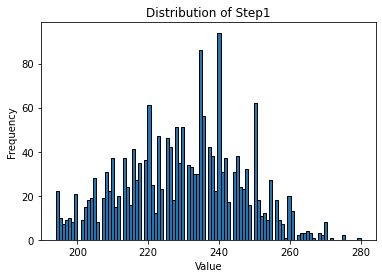

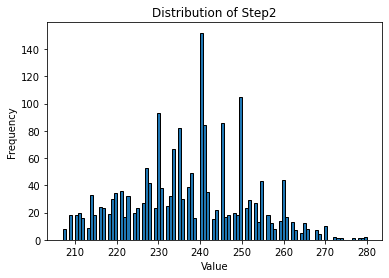

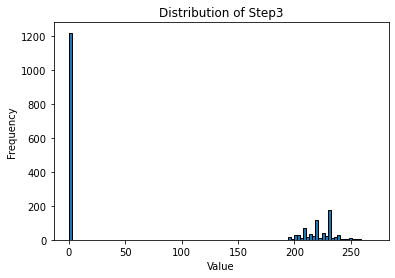

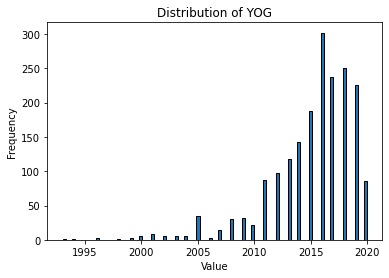

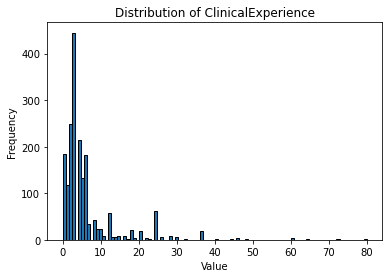

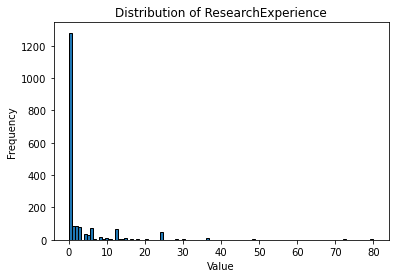

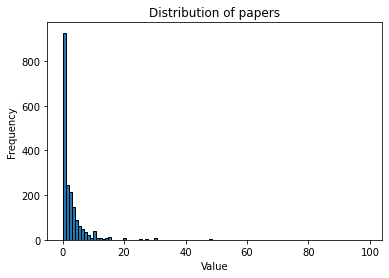

In [81]:
import matplotlib.pyplot as plt

features_toNormalize = ['Step1', 'Step2', 'Step3', 'YOG', 'ClinicalExperience', 'ResearchExperience', 'papers']
X_train_normalize = X_train.copy()
X_test_normalize = X_test.copy()

for feature in features_toNormalize:
    plt.hist(X_train[feature], bins=100, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [82]:
for feature in features_toNormalize:
    X_test_normalize[feature] = (X_test_normalize[feature] - X_train[feature].mean())/X_train[feature].std()
    X_train_normalize[feature] = (X_train_normalize[feature] - X_train[feature].mean())/X_train[feature].std()
    
    
X_test_normalize.describe()

,Step1,Step1Failure,Step2,Step2Failure,Step2CSFailure,Step3,Step3Failures,VisaNeeded,YOG,PriorResidency,ClinicalExperience,ResearchExperience,papers,0,1,2,3,4,5
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,-0.140013,0.048117,0.008080,0.037657,0.150628,0.008654,0.004184,0.656904,0.012514,0.146444,-0.014465,-0.020271,0.110155,0.100418,0.635983,0.046025,0.058577,0.100418,0.058577
std,1.018839,0.274314,0.961902,0.239331,0.407361,1.000410,0.064617,0.475241,0.976258,0.353921,0.936006,0.890861,1.366087,0.300872,0.481657,0.209759,0.235078,0.300872,0.235078
min,-2.145504,0.000000,-2.142720,0.000000,0.000000,-0.748595,0.000000,0.000000,-6.051533,0.000000,-0.747045,-0.372424,-0.457532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.866254,0.000000,-0.651098,0.000000,0.000000,-0.748595,0.000000,0.000000,-0.497380,0.000000,-0.495394,-0.372424,-0.457532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.098704,0.000000,0.059198,0.000000,0.000000,-0.748595,0.000000,1.000000,0.221393,0.000000,-0.369568,-0.372424,-0.261608,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.623696,0.000000,0.627434,0.000000,0.000000,1.255780,0.000000,1.000000,0.744136,0.000000,0.007909,-0.137163,0.130240,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.513297,3.000000,3.610677,3.000000,2.000000,1.690294,1.000000,1.000000,1.266880,1.000000,5.292592,6.685392,19.134850,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
X_train_normalize.describe()

,Step1,Step1Failure,Step2,Step2Failure,Step2CSFailure,Step3,Step3Failures,VisaNeeded,YOG,PriorResidency,ClinicalExperience,ResearchExperience,papers,0,1,2,3,4,5
count,1.909000e+03,1909.000000,1.909000e+03,1909.000000,1909.000000,1.909000e+03,1909.000000,1909.000000,1.909000e+03,1909.000000,1.909000e+03,1.909000e+03,1.909000e+03,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000
mean,-6.767184e-16,0.042431,-8.194365e-16,0.050288,0.155055,-1.336455e-16,0.012048,0.662651,-2.833587e-14,0.158198,-3.780225e-19,1.558616e-16,1.272482e-16,0.096909,0.631221,0.065479,0.056574,0.105815,0.044002
std,1.000000e+00,0.241808,1.000000e+00,0.273930,0.433227,1.000000e+00,0.227468,0.472929,1.000000e+00,0.365022,1.000000e+00,1.000000e+00,1.000000e+00,0.295912,0.482600,0.247435,0.231088,0.307681,0.205153
min,-2.145504e+00,0.000000,-2.142720e+00,0.000000,0.000000,-7.485948e-01,0.000000,0.000000,-5.790161e+00,0.000000,-7.470452e-01,-3.724240e-01,-4.575319e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.007042e-01,0.000000,-7.221280e-01,0.000000,0.000000,-7.485948e-01,0.000000,0.000000,-3.013512e-01,0.000000,-4.953937e-01,-3.724240e-01,-4.575319e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.169597e-02,0.000000,5.919753e-02,0.000000,0.000000,-7.485948e-01,0.000000,1.000000,2.213925e-01,0.000000,-3.695679e-01,-3.724240e-01,-2.616081e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,6.838961e-01,0.000000,6.984638e-01,0.000000,0.000000,1.269796e+00,0.000000,1.000000,7.441363e-01,0.000000,7.909425e-03,-1.371634e-01,1.302396e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.031697e+00,3.000000,3.042440e+00,3.000000,5.000000,1.774394e+00,9.000000,1.000000,1.266880e+00,1.000000,9.319017e+00,9.037997e+00,1.893893e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
X_train.describe()

,Step1,Step1Failure,Step2,Step2Failure,Step2CSFailure,Step3,Step3Failures,VisaNeeded,YOG,PriorResidency,ClinicalExperience,ResearchExperience,papers,0,1,2,3,4,5
count,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000
mean,229.639602,0.042431,237.166579,0.050288,0.155055,80.111577,0.012048,0.662651,2015.152960,0.158198,5.937140,3.166056,2.335254,0.096909,0.631221,0.065479,0.056574,0.105815,0.044002
std,16.611292,0.241808,14.078639,0.273930,0.433227,107.015936,0.227468,0.472929,3.825966,0.365022,7.947497,8.501213,5.104025,0.295912,0.482600,0.247435,0.231088,0.307681,0.205153
min,194.000000,0.000000,207.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,218.000000,0.000000,227.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,230.000000,0.000000,238.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,241.000000,0.000000,247.000000,0.000000,0.000000,216.000000,0.000000,1.000000,2018.000000,0.000000,6.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,280.000000,3.000000,280.000000,3.000000,5.000000,270.000000,9.000000,1.000000,2020.000000,1.000000,80.000000,80.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Trials on model

Methods for dependent variables in [0, 1]

1. Use a regression model to find coefficients for the case when continuous values are in [0, 1] 
    - Quasi-Binomial Regression 
    - Beta-regression (not implemented)
2. Just use simple linear regression. <br>
3. Hand-craft prediction and backward-propagation functions adapted from logistic regression
    - similar to screenshot sample
    - but violate the binary label assumption --> performance may not be good
4. ~Convert the numerical target values to the target values~ (information loss, no matching probability provided)~

## 1. Quasi-Binomial Regression

In [88]:
## Quasi-Binomial Regression 
# - For a binary outcome (where Y can be 0 or 1), 
# the expected value μ is modeled using the logit link function in a manner similar to logistic regression:

X = X_train_normalize.values
y = y_train.values / 100

X_const = sm.add_constant(X)

# Fit the model
model = sm.GLM(y, X_const, family=sm.families.Binomial())
result = model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1909
Model:                            GLM   Df Residuals:                     1890
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -805.46
Date:                Wed, 23 Aug 2023   Deviance:                       68.158
Time:                        14:28:56   Pearson chi2:                     67.0
No. Iterations:                    32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6659      0.100      6.633      0.0

In [93]:
## Test MSE
X_new = X_test_normalize.values
X_new_const = sm.add_constant(X_new)

y_pred = result.predict(X_new_const)
print(np.mean((y_test.values/100 - y_pred) ** 2))

0.007524606341212601


In [94]:
## Train MSE
X_new = X_train_normalize.values
X_new_const = sm.add_constant(X_new)

y_pred = result.predict(X_new_const)
print(np.mean((y_train.values/100 - y_pred) ** 2))

0.007625043431060808


## 2. Linear regression

In [106]:
# scale of y makes no difference to the fitted model (just * 100)
X = X_train_normalize.values
y = y_train.values / 100

reg = LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[ 0.10496314 -0.00071284  0.05600505 -0.04642953 -0.02054462 -0.02547785
  0.0265882  -0.15829295  0.05906331  0.05047031  0.00582907  0.01835482
  0.00464023 -0.02786542 -0.0183818  -0.01600417  0.07924811  0.11148927
 -0.12848599]
0.6688237759317404


In [108]:
import math

y_pred = reg.predict(X_test_normalize.values)
print(math.sqrt(np.mean((y_test.values/100 - y_pred) ** 2)))

0.09214325699593977


In [110]:
y_pred = reg.predict(X_train_normalize.values)
print(math.sqrt(np.mean((y_train.values/100 - y_pred) ** 2)))

0.09012022657008639


## 3. Hand-craft prediction and backward-propagation functions adapted from logistic regression

In [125]:
# suppose loss function is log-likelihood loss --> MSE too large

import numpy as np


class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.num_iterations):
            # Compute the model's prediction
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return y_predicted

    
X = X_train_normalize.values
y = y_train.values / 100

# test num_iteration = 1e5
regressor = LogisticRegression(learning_rate=0.01, num_iterations=int(1e3))
regressor.fit(X, y)
predictions = regressor.predict(X)

y_pred = reg.predict(X_test_normalize.values)
print(f'test MSE = {math.sqrt(np.mean((y_test.values/100 - y_pred) ** 2))}')

y_pred = reg.predict(X_train_normalize.values)
print(f'train MSE = {math.sqrt(np.mean((y_train.values/100 - y_pred) ** 2))}')

# test num_iteration = 1e6
regressor = LogisticRegression(learning_rate=0.01, num_iterations=int(1e4))
regressor.fit(X, y)
predictions = regressor.predict(X)

y_pred = reg.predict(X_test_normalize.values)
print(f'test MSE = {math.sqrt(np.mean((y_test.values/100 - y_pred) ** 2))}')

y_pred = reg.predict(X_train_normalize.values)
print(f'train MSE = {math.sqrt(np.mean((y_train.values/100 - y_pred) ** 2))}')

test MSE = 56.60944224972303
train MSE = 57.99705082429104
test MSE = 56.60944224972303
train MSE = 57.99705082429104


In [126]:
# suppose loss function is MSE

import numpy as np


class LogisticRegression1:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.num_iterations):
            # Compute the model's prediction
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, y_predicted * (y_predicted - y) * (1 - y_predicted))
            db = (1 / num_samples) * np.sum(y_predicted * (y_predicted - y) * (1 - y_predicted))
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return y_predicted

    
X = X_train_normalize.values
y = y_train.values / 100

# test num_iteration = 1e5
regressor = LogisticRegression1(learning_rate=0.01, num_iterations=int(1e3))
regressor.fit(X, y)
predictions = regressor.predict(X)

y_pred = reg.predict(X_test_normalize.values)
print(f'test MSE = {math.sqrt(np.mean((y_test.values/100 - y_pred) ** 2))}')

y_pred = reg.predict(X_train_normalize.values)
print(f'train MSE = {math.sqrt(np.mean((y_train.values/100 - y_pred) ** 2))}')

# test num_iteration = 1e6
regressor = LogisticRegression1(learning_rate=0.01, num_iterations=int(1e4))
regressor.fit(X, y)
predictions = regressor.predict(X)

y_pred = reg.predict(X_test_normalize.values)
print(f'test MSE = {math.sqrt(np.mean((y_test.values/100 - y_pred) ** 2))}')

y_pred = reg.predict(X_train_normalize.values)
print(f'train MSE = {math.sqrt(np.mean((y_train.values/100 - y_pred) ** 2))}')

test MSE = 56.60944224972303
train MSE = 57.99705082429104
test MSE = 56.60944224972303
train MSE = 57.99705082429104


In [ ]:
# follow exactly the captured screenshot with log-likelihood loss



In [11]:


coefficients = result.params
features = ['Intercept'] + ['X' + str(i+1) for i in range(X.shape[1])]

formula = "y = "
for feat, coef in zip(features, coefficients):
    formula += f"{coef:.4f}*{feat} + "

# Remove the trailing " + " and print
formula = formula.rstrip(" + ")
print(formula)


y = -0.5435*Intercept + 0.6870*X1 + 0.3159*X2


In [12]:
X_new_const

array([[1. , 0.5, 0.3],
       [1. , 0.2, 0.7]])

In [16]:
np.exp(0.6870 * 0.2 + 0.3159 * 0.7 - 0.5435) / (1+np.exp(0.6870 * 0.2 + 0.3159 * 0.7 - 0.5435) )

0.4538888951569134

2.718281828459045